<h2 align="center">Image Compression with K-means Clustering</h2>

In [16]:
#Importing Libraries
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [17]:
plt.rcParams['figure.figsize'] = (20, 12)

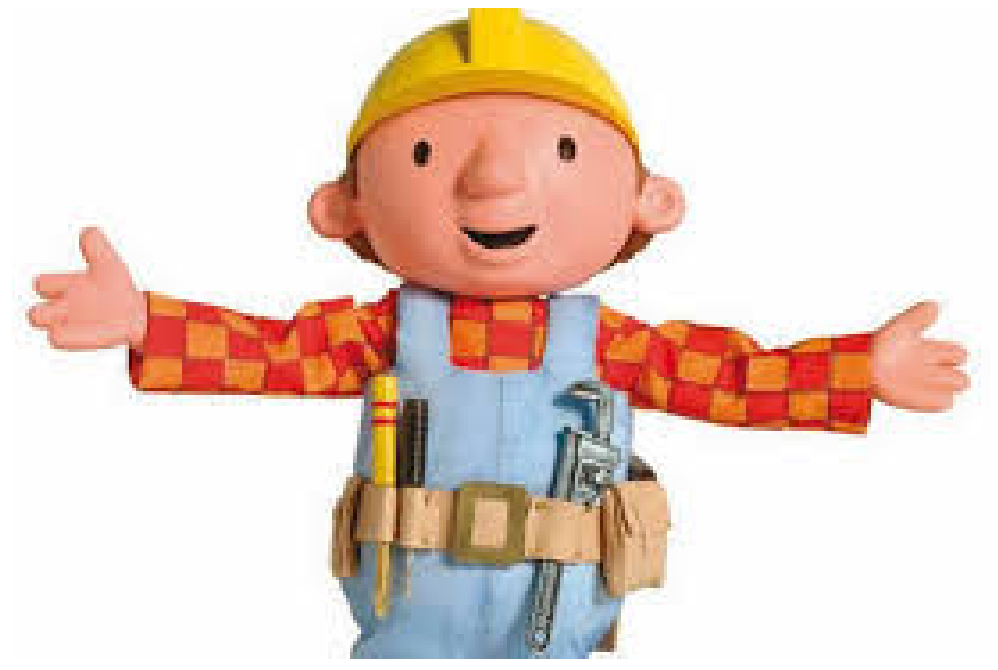

In [18]:
#Data Preprocessing
img = io.imread('images/5-bob.jpg')
ax = plt.axes(xticks=[], yticks=[])#to ensure that our axis dont have Xticks,yticks (numbers)
ax.imshow(img); #we dont want refernce to this matplotlib object also printed so we use ";"

In [19]:
img.shape

(183, 275, 3)

In [20]:
img

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [21]:
#normalising our pixel values
img_data = (img / 255.0).reshape(-1, 3) # .reshape(183*275, 3)
img_data.shape

(50325, 3)

### Visualizing the Color Space using Point Clouds
---

In [22]:
from plot_utils import plot_utils

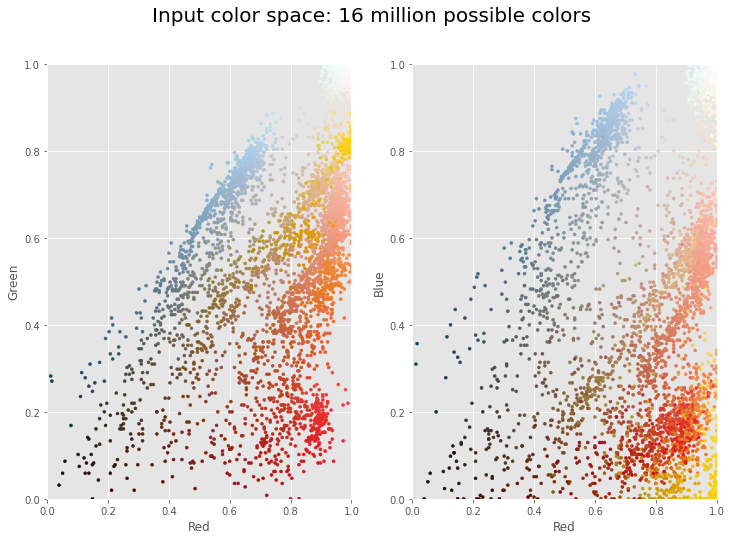

In [23]:
x = plot_utils(img_data, title='Input color space: 16 million possible colors')
x.colorSpace()
#so their is sharp transition from one color space to other so we have to make it segmented transition 
#it has very smooth gradient

In [29]:
from sklearn.cluster import MiniBatchKMeans
#high resolution images ==MiniBatchKMeans==>small batches 

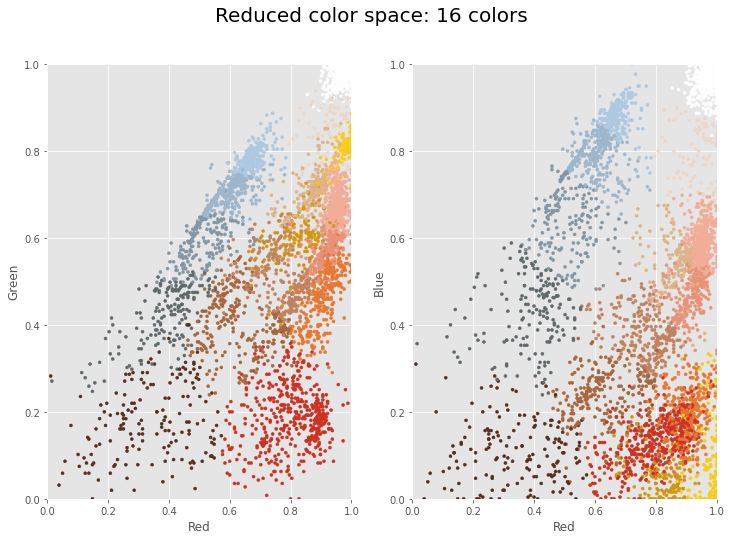

In [30]:
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)] #here we are predicting 16 colors on the img 

y = plot_utils(img_data, colors=k_colors, title="Reduced color space: 16 colors")
y.colorSpace()

### K-means Image Compression with Interactive Controls
---

In [33]:
img_dir = 'images/'
#adding dropdown menu and a slider using Ipythonwidgets
#https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

In [34]:
@interact #decorater 
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1,max=256,step=1,value=16,
                                                             continuous_update=False,
                                                             layout=dict(width='100%'))):
    
    #continuous_update will be false so only update when we realease the slider
    #width here is sliderlayout 
    input_img = io.imread(img_dir + image)
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    #After K-means has converged, load the large image into your program and 
    #replace each of its pixels with the nearest of the centroid colors you found
    #from the small image. 
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)#this show 1 row but 2 col means one row has 2 images
    fig.suptitle('K-means Clustering (Dominant colors Extraction)', fontsize=50)
    
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral.jpg', '10-Sunset.jpg', …